In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

In [2]:
N=100
dx=1/N
x=np.linspace(0,1,N+1)
%matplotlib inline

In [3]:
def mL2V(x):
    return 0*x

In [4]:
def she_1d(x,n):
    V=mL2V(x)
    plt.grid()
    plt.plot(x,V)
    d =  1/dx**2 + mL2V(x)[1:-1] #dont take the first and last point
    e =  (-0.5/(dx**2))*np.ones(len(d)-1)
    w,v = eigh_tridiagonal(d,e)
    
    plt.figure()
    for i in range(n):
        plt.plot(v.T[i])
    plt.figure()
    plt.bar(np.arange(0, n, 1), w[0:n])
    plt.ylabel('$mL^2 E/\hbar^2$')
    return w,v

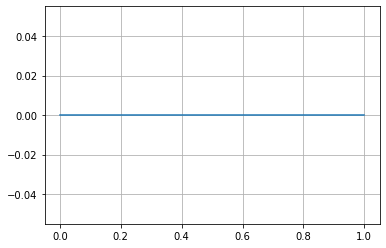

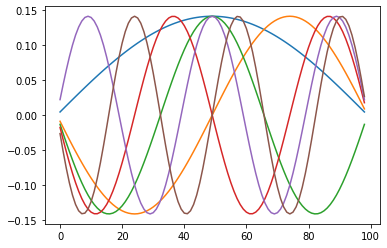

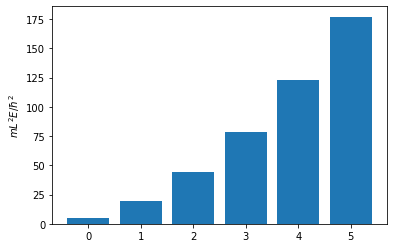

In [5]:
x1=np.linspace(0,1,N+1)
w1,v1= she_1d(x1,6)

In [6]:
import numpy as np
from scipy.sparse.linalg import eigsh
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter
plt.style.use(['science', 'notebook'])
from scipy import sparse

In [7]:
N = 150
X1, X2 = np.meshgrid(np.linspace(0,1,N, dtype=float),
                   np.linspace(0,1,N, dtype=float))

In [8]:
def get_potential(x,y):
    return 0*x
#def get_potential(x, y):
#    return np.exp(-(x-0.3)**2/(2*0.1**2))*np.exp(-(y-0.3)**2/(2*0.1**2))
V = get_potential(X1,X2)

In [9]:
diag = np.ones([N])
diags = np.array([diag, -2*diag, diag])
D = sparse.spdiags(diags, np.array([-1,0,1]), N, N)
T = -1/2 * sparse.kronsum(D,D)
U = sparse.diags(V.reshape(N**2), (0))
H = T+U

In [10]:
nn=10
eigenvalues, eigenvectors = eigsh(H, k=nn, which='SM')
def get_e(n):
    return eigenvectors.T[n].reshape((N,N))

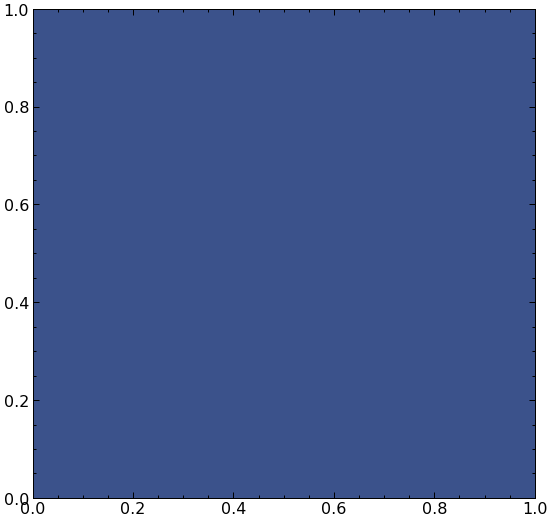

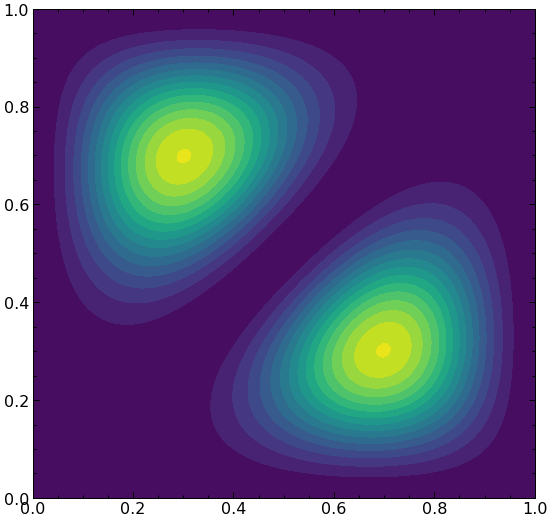

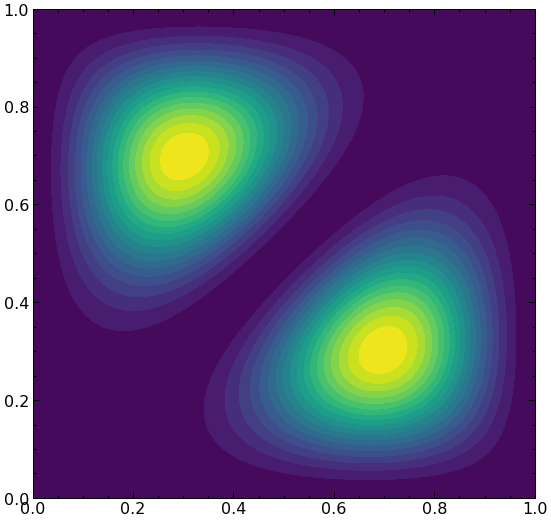

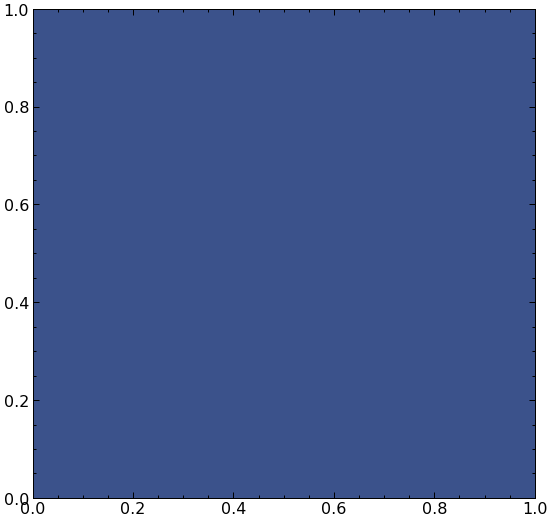

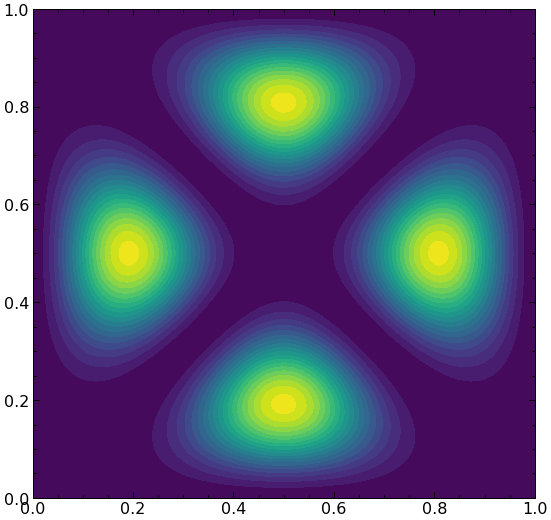

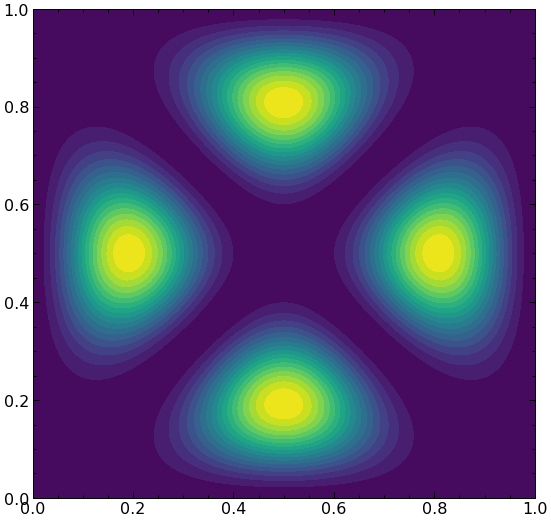

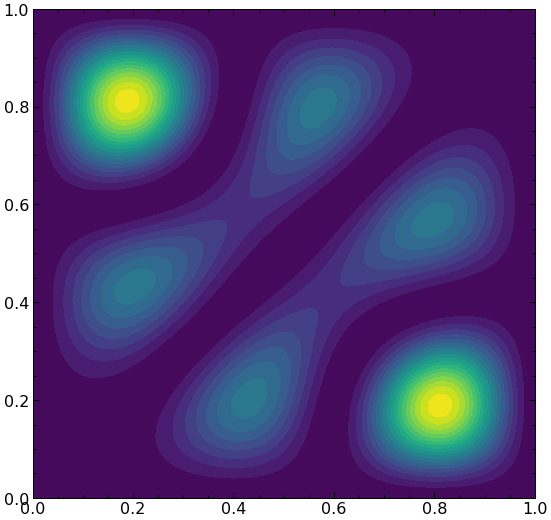

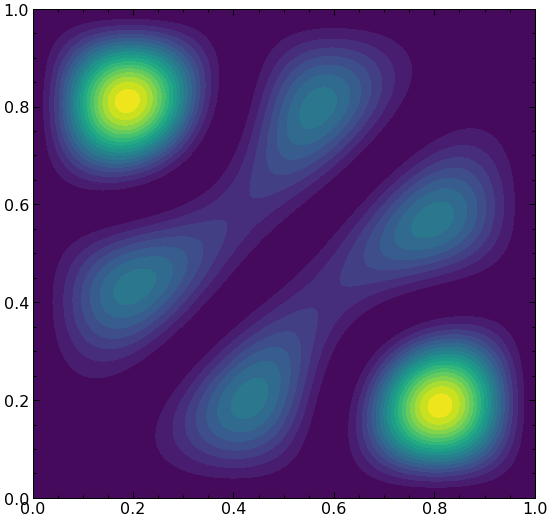

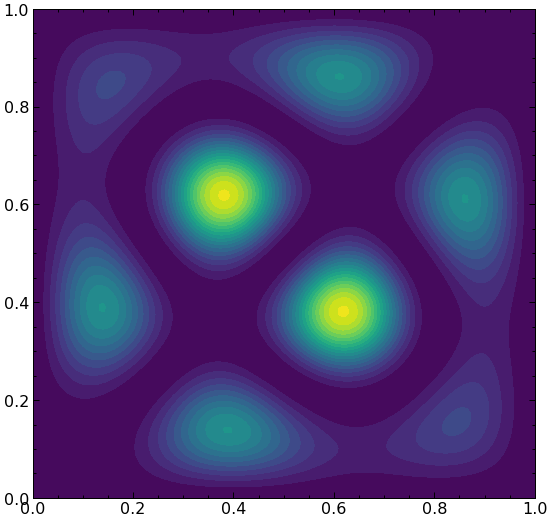

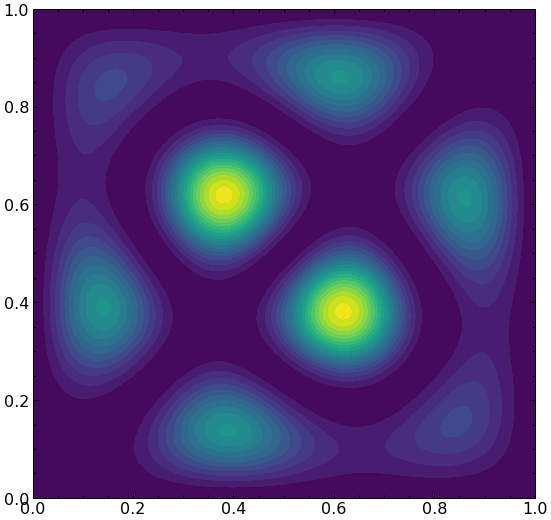

In [11]:
#for i in range(1):
nn
for i in range(nn):
    a = (get_e(i) - get_e(i).swapaxes(0,1))/np.sqrt(2)
    for k in range(a.shape[0]):
        for j in range(a.shape[1]):
            if a[k,j]*a[k,j]<10**(-15):
                a[k,j]=0
    plt.figure(figsize=(9,9))
    plt.contourf(X1, X2, a**2, 20)

<BarContainer object of 10 artists>

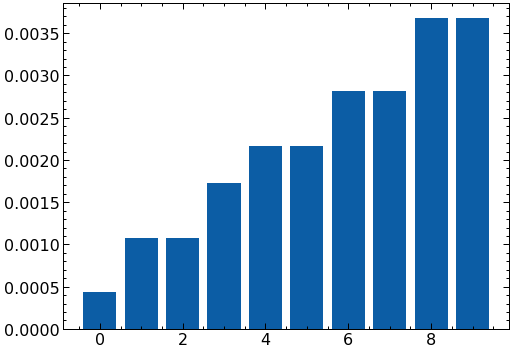

In [12]:
plt.bar(np.arange(0, nn, 1), eigenvalues[0:nn])

[[1.00000000e-05 6.71140940e-03 1.34228188e-02 ... 9.86577181e-01
  9.93288591e-01 1.00000000e+00]
 [6.71140940e-03 1.00000000e-05 6.71140940e-03 ... 9.79865772e-01
  9.86577181e-01 9.93288591e-01]
 [1.34228188e-02 6.71140940e-03 1.00000000e-05 ... 9.73154362e-01
  9.79865772e-01 9.86577181e-01]
 ...
 [9.86577181e-01 9.79865772e-01 9.73154362e-01 ... 1.00000000e-05
  6.71140940e-03 1.34228188e-02]
 [9.93288591e-01 9.86577181e-01 9.79865772e-01 ... 6.71140940e-03
  1.00000000e-05 6.71140940e-03]
 [1.00000000e+00 9.93288591e-01 9.86577181e-01 ... 1.34228188e-02
  6.71140940e-03 1.00000000e-05]]


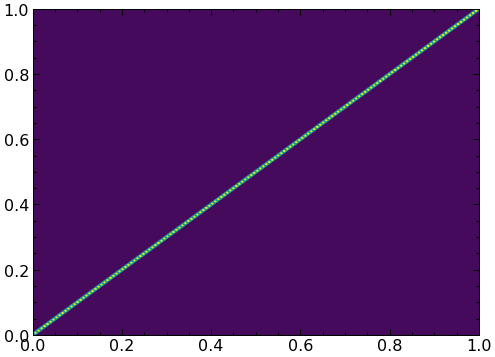

In [13]:
N = 150
X1, X2 = np.meshgrid(np.linspace(0,1,N, dtype=float),
                   np.linspace(0,1,N, dtype=float))
def get_potential(x,y):
    r = np.abs(x - y)
    r = np.where(r < 10**(-5), 10**(-5), r)
    V = 1/ r
    print(r)
    return V,r
#def get_potential(x, y):
#    return np.exp(-(x-0.3)**2/(2*0.1**2))*np.exp(-(y-0.3)**2/(2*0.1**2))
V,rr = get_potential(X1,X2)
plt.contourf(X1, X2, V, 20)

In [14]:
#plt.imshow(rr)
np.min(rr)


1e-05

In [15]:
diag = np.ones([N])
diags = np.array([diag, -2*diag, diag])
D = sparse.spdiags(diags, np.array([-1,0,1]), N, N)
T = -1/2 * sparse.kronsum(D,D)
U = sparse.diags(V.reshape(N**2), (0))
H = T+U

In [16]:
nn=10
eigenvalues, eigenvectors = eigsh(H, k=nn, which='SM')
def get_e(n):
    return eigenvectors.T[n].reshape((N,N))
plt.contourf(X1, X2, get_e(0)**2, 20)

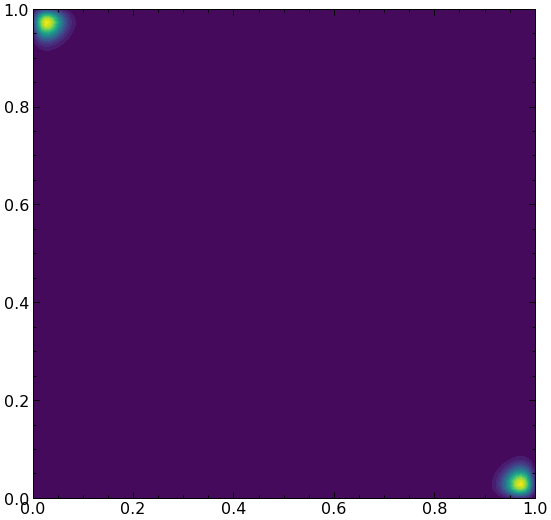

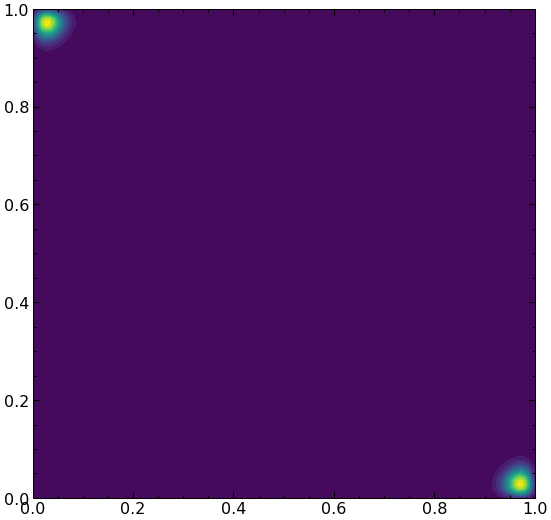

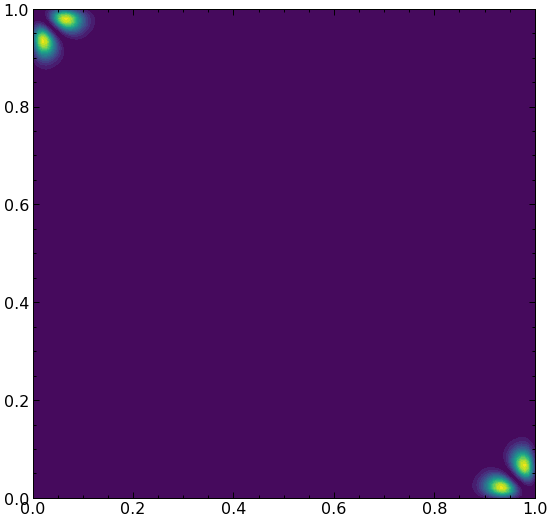

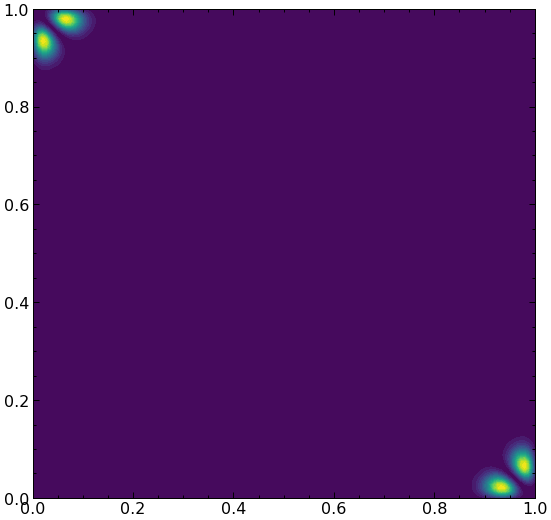

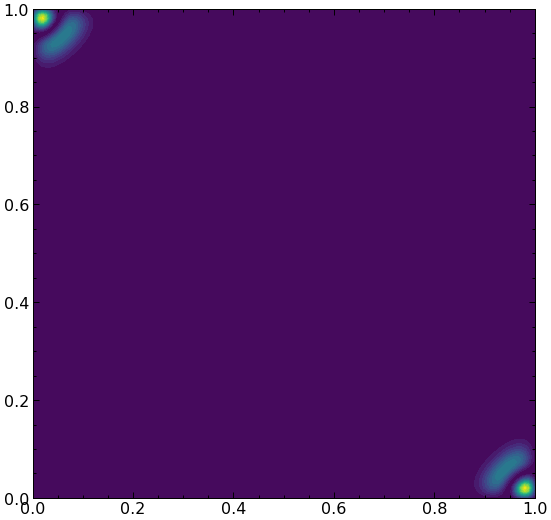

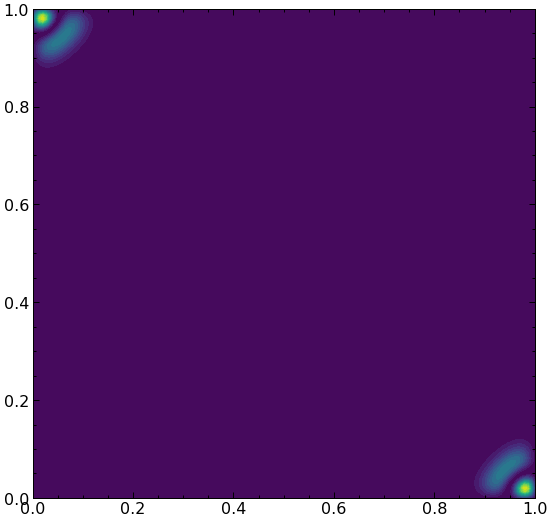

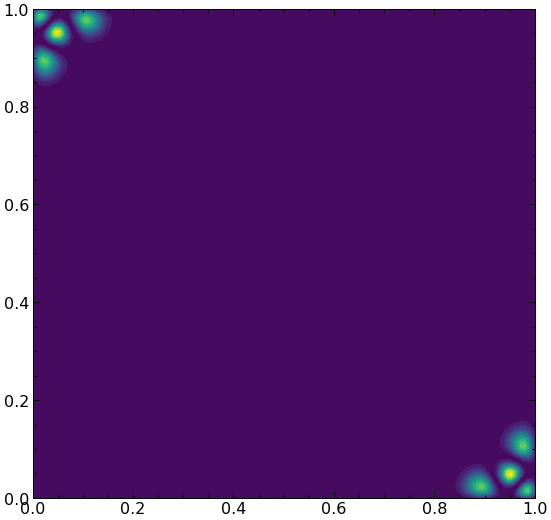

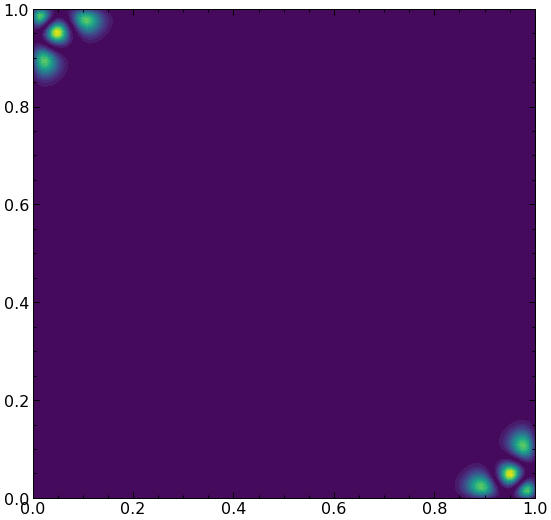

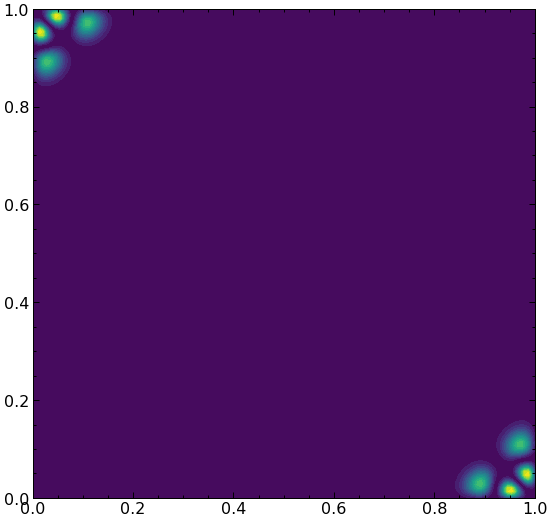

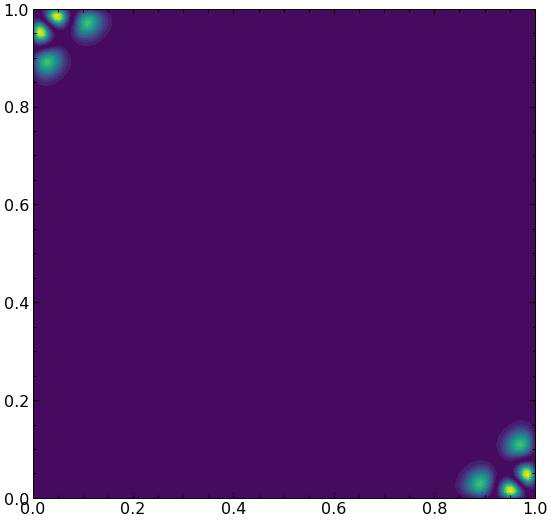

In [21]:
#for i in range(1):
nn
for i in range(nn):
    a = (get_e(i) - get_e(i).swapaxes(0,1))/np.sqrt(2)
    for k in range(a.shape[0]):
        for j in range(a.shape[1]):
            if a[k,j]*a[k,j]<10**(-15):
                a[k,j]=0
    plt.figure(figsize=(9,9))
    plt.contourf(X1, X2, a**2, 20)

(1.1, 1.5)

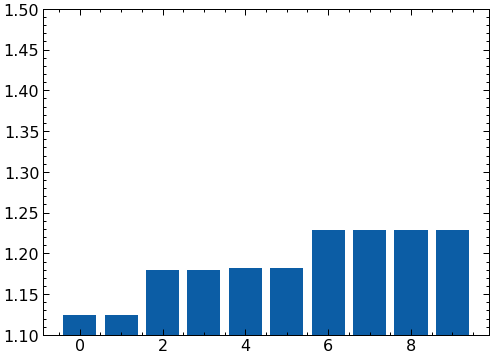

In [23]:
plt.bar(np.arange(0, nn, 1), eigenvalues[0:nn])
plt.ylim(1.1,1.5)

In [25]:
!pip install notebook-as-pdf


     |████████████████████████████████| 77 kB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 83 kB 4.4 MB/s  eta 0:00:01
     |████████████████████████████████| 96 kB 3.2 MB/s eta 0:00:01
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-py3-none-any.whl size=61101 sha256=810e5ab6b27ec6a113338b2c9b945fd0231f313e6edc85e5d65a80468b444985
  Stored in directory: /Users/pranavkairon/Library/Caches/pip/wheels/80/1a/24/648467ade3a77ed20f35cfd2badd32134e96dd25ca811e64b3
Successfully built PyPDF2
